# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from subprocess import call

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

def set_params(counter):
    if (counter == 0):
        kernel1     = "cpu"
        size1       = "small"
        kernel2     = "vm"
        size2       = "small"
        
    elif (counter == 1):
        kernel1     = "cpu"
        size1       = "small"
        kernel2     = "cpu"
        size2       = "large"
        
    elif (counter == 2):
        kernel1     = "vm"
        size1       = "small"
        kernel2     = "vm"
        size2       = "large"
        
    elif (counter == 3):
        kernel1     = "vm"
        size1       = "small"
        kernel2     = "cpu"
        size2       = "large"
        
    elif (counter == 4):
        kernel1     = "cpu"
        size1       = "large"
        kernel2     = "vm"
        size2       = "large"

Program parameters:

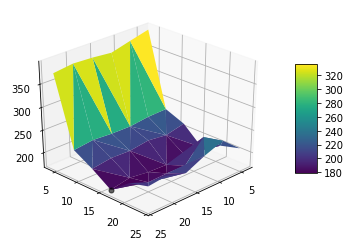

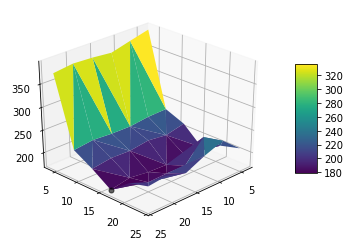

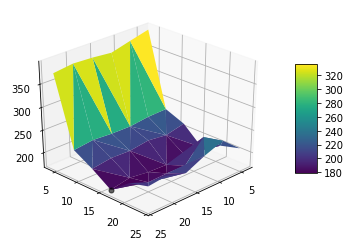

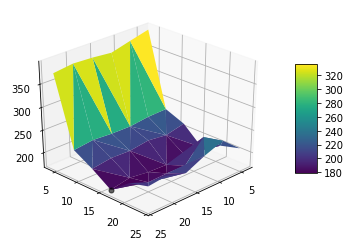

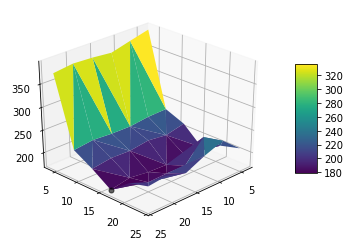

In [2]:
machine    = "spa"
kernel1     = "vm"
size1       = "small"
kernel2     = "cpu"
size2       = "large"
randomised = False

nc1 = 24
nc2 = 24




for count in range(0, 5):
    
    set_params(count)

    if machine == "spa":
        number_of_tests = 1296
        num_workers_max = 24
        num_cores_max   = 24
        greater_than_threshold = 12

    elif machine == "XXXII":
        number_of_tests = 576
        num_workers_max = 48
        num_cores_max   = 48
        greater_than_threshold = 32

    # if randomised == True:
    #     folder_path1 = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_" + kernel2 + "_" + size2 + "_randomised/"
    #     graph_path   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_" + kernel2 + "_" + size2 + "_randomised.png"

    # else:
    folder_path1   = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_1/"
    folder_path2   = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_2/"
    graph_path     = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".png"
    graph_folder   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "/"
    graph_aminated = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".gif"

    if not os.path.exists(graph_folder):
        os.makedirs(graph_folder)





    file_names = []

    for i in range(1, number_of_tests + 1): 
        file_names.append("test" + str(i) + "/output")





    data1 = []
    data2 = []

    fetch_data(folder_path1, file_names, data1, ["Runtime"])
    fetch_data(folder_path2, file_names, data2, ["Runtime"])

    dataset = []

    num_workers_min = 4
    num_workers_step = 4
    num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
    nwv_len = len(num_workers_values)
    num_workers = num_workers_values[0]

    num_cores_min = 4
    num_cores_step = 4
    num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
    ncv_len = len(num_cores_values)
    num_cores = num_cores_values[0]

    for i in range(len(data1)):
        num_workers1 = num_workers_values[i % nwv_len]
        num_cores1 = num_cores_values[(i // nwv_len) % ncv_len]
        num_workers2 = num_workers_values[((i // nwv_len) // ncv_len) % nwv_len]
        num_cores2 = num_cores_values[(((i // nwv_len) // ncv_len) // nwv_len) % ncv_len]

        dataset.append([int(num_cores1), int(num_workers1), int(num_cores2), int(num_workers2), data1[i][1:].mean()[0] + data2[i][1:].mean()[0]])

    dataset = pd.DataFrame(dataset)
    dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Total Runtime"]





    reduced_dataset = dataset[(dataset["Num Cores 1"] == nc1) & (dataset["Num Cores 2"] == nc2)]

    min_runtime = min(reduced_dataset["Total Runtime"])

    nw1 = reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]["Num Workers 1"].item()

    nw2 = reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]["Num Workers 2"].item()

    # reduced_dataset[reduced_dataset["Total Runtime"] == min(reduced_dataset["Total Runtime"])]





    # Plot figure
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(reduced_dataset["Num Workers 1"], reduced_dataset["Num Workers 2"], reduced_dataset["Total Runtime"], cmap=plt.cm.viridis, linewidth=0.01)

    # Add a color bar which maps values to colors
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Rotate
    ax.view_init(30, 45)

    # Plot minimum point
    ax.plot([nw1], [nw2], [min_runtime], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)

    plt.savefig(graph_path)





#     call("rm " + graph_folder + "*.png", shell=True)

#     call("rm " + graph_aminated, shell=True)

#     for angle in range(45, 200, 2):

#         # Make the plot
#         fig = plt.figure()
#         ax = fig.gca(projection='3d')
#         ax.plot_trisurf(reduced_dataset["Num Workers 1"], reduced_dataset["Num Workers 2"], reduced_dataset["Total Runtime"], cmap=plt.cm.viridis, linewidth=0.01)

#         # Set the angle of the camera
#         ax.view_init(30, angle)

#         # Plot minimum point
#         ax.plot([nw1], [nw2], [min_runtime], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)

#         # Save it
#         filename = graph_folder + str(angle) + '.png'
#         plt.savefig(filename, dpi=256)
#         plt.gca()

#     call("convert -delay 15 " + graph_folder + "*.png " + graph_aminated, shell=True)